In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random, requests
from bs4 import BeautifulSoup

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/dilanbhalla/hackathon2020/master/data.csv?token=AD2K44S3UDQN47DHASNTBTK7FKBXS")

In [19]:
df.head(5)

,UUID,Gender,Age,Profession,Locality/Pin Code,Rate of infection in that zone,Pre-existing medical conditions,Travel history in the last 1 month,Coming in contact with someone who has been diagnosed with Covid 19,Do you have any kind of Covid 19 symptoms
0,5352-8914-8969-5463,F,49,Health Care,560086,0.8,Heart,Y,N,N
1,4291-3296-5483-8639,M,56,None,590003,0.9,Kidney Ailments,N,N,Y
2,1267-3191-3679-1305,M,51,Police,577165,1.0,Cancer,Y,N,N
3,4082-5290-6645-8333,M,50,Work from Home,571265,1.0,Cancer,N,N,Y
4,8640-8060-6813-8380,F,49,Security,570020,1.2,Pulmonary,N,N,N


In [20]:
!pip install kmodes


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [21]:
from kmodes.kmodes import KModes


In [22]:
km = KModes(n_clusters=2, init='Huang', n_init=11, verbose=1)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(df)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 5820.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 246, cost: 5781.0
Run 2, iteration: 2/100, moves: 62, cost: 5774.0
Run 2, iteration: 3/100, moves: 2, cost: 5774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 226, cost: 5770.0
Run 3, iteration: 2/100, moves: 21, cost: 5770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 236, cost: 5839.0
Run 4, iteration: 2/100, moves: 34, cost: 5839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 180, cost: 5820.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 367, cost: 5872.0
Run 6, iteration: 2/100, m

In [23]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 5807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 5588.0
Run 1, iteration: 2/100, moves: 8, cost: 5588.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 5409.0


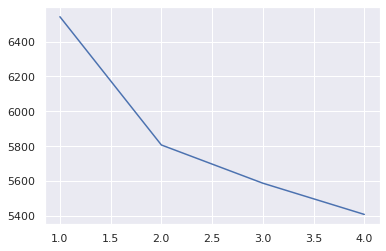

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [25]:
df_copy = df.copy()
df_new = df_copy.reset_index()
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_new, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf


,UUID,Gender,Age,Profession,Locality/Pin Code,Rate of infection in that zone,Pre-existing medical conditions,Travel history in the last 1 month,Coming in contact with someone who has been diagnosed with Covid 19,Do you have any kind of Covid 19 symptoms,cluster_predicted
0,5352-8914-8969-5463,F,49,Health Care,560086,0.8,Heart,Y,N,N,0
1,4291-3296-5483-8639,M,56,None,590003,0.9,Kidney Ailments,N,N,Y,1
2,1267-3191-3679-1305,M,51,Police,577165,1.0,Cancer,Y,N,N,1
3,4082-5290-6645-8333,M,50,Work from Home,571265,1.0,Cancer,N,N,Y,0
4,8640-8060-6813-8380,F,49,Security,570020,1.2,Pulmonary,N,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...
995,3749-8192-7780-6515,F,29,Bank,587116,1.2,None,N,Y,Y,0
996,1407-2841-8704-5230,F,20,None,577115,1.0,Cancer,N,N,N,0
997,1687-9331-8489-2394,M,18,None,575003,1.2,Diabetes,Y,N,N,1
998,6411-6890-3203-6217,M,54,Work from Home,571265,1.1,Pulmonary,N,N,Y,0


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [31]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()


In [32]:
df.columns

Index(['UUID', 'Gender', 'Age', 'Profession', 'Locality/Pin Code',
       'Rate of infection in that zone', 'Pre-existing medical conditions',
       'Travel history in the last 1 month',
       'Coming in contact with someone who has been diagnosed with Covid 19',
       'Do you have any kind of Covid 19 symptoms'],
      dtype='object')

In [36]:
combinedDf['Gender'] = encoder.fit_transform(combinedDf['Gender'].astype(str))
combinedDf['Age'] = encoder.fit_transform(combinedDf['Age'].astype(str))
combinedDf['Profession'] = encoder.fit_transform(combinedDf['Profession'].astype(str))

combinedDf['Locality/Pin Code'] = encoder.fit_transform(combinedDf['Locality/Pin Code'].astype(str))
combinedDf[['Rate of infection in that zone']] = encoder.fit_transform(combinedDf['Rate of infection in that zone'].astype(str))
combinedDf[['Pre-existing medical conditions']] = encoder.fit_transform(combinedDf['Pre-existing medical conditions'].astype(str))
combinedDf[['Travel history in the last 1 month']] = encoder.fit_transform(combinedDf['Travel history in the last 1 month'].astype(str))
combinedDf[['Do you have any kind of Covid 19 symptoms']] = encoder.fit_transform(combinedDf['Do you have any kind of Covid 19 symptoms'].astype(str))
combinedDf[['Coming in contact with someone who has been diagnosed with Covid 19']] = encoder.fit_transform(combinedDf['Coming in contact with someone who has been diagnosed with Covid 19'].astype(str))


## Boosted RandomForestClassifier

In [17]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = AdaBoostClassifier(rf,50,0.01,'SAMME.R',10)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_estimators=50, learning_rate=0.01, algorithm=SAMME.R, random_state=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [37]:
X =  combinedDf[['Gender','Age','Profession','Locality/Pin Code', 'Rate of infection in that zone', 'Pre-existing medical conditions', 'Travel history in the last 1 month','Coming in contact with someone who has been diagnosed with Covid 19', 'Do you have any kind of Covid 19 symptoms']]
Y = combinedDf['cluster_predicted']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         min_samples_leaf=2),
                   learning_rate=0.01, random_state=10)

In [39]:
pred = np.array(classifier.predict(X_test))

recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
ma = classifier.score(X_test,Y_test)

In [40]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.76
Precision Score:  0.8142857142857143
F1 Score:  0.7862068965517242
Accuracy:  0.845

	Table 3

     cluster_predicted  pred
993                  0     0
859                  1     1
298                  1     1
553                  0     0
672                  0     0


## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

DecisionTreeClassifier(max_depth=2)

    Evalutation of model

In [43]:
pred = np.array(classifier.predict(X_test))

recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)


In [44]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.5116279069767442
Precision Score:  0.8627450980392157
F1 Score:  0.6423357664233577
Accuracy:  0.755

	Table 3

     cluster_predicted  pred
841                  1     0
956                  1     1
544                  0     0
173                  1     1
759                  1     1


Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

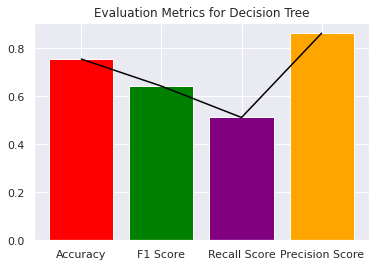

In [45]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc,f1_dtc,recall_dtc,precision_dtc],color=['red','green','purple','orange'])
plt.plot([ma_dtc,f1_dtc,recall_dtc,precision_dtc],color='black')
plt.title('Evaluation Metrics for Decision Tree')

### Comparison of all models

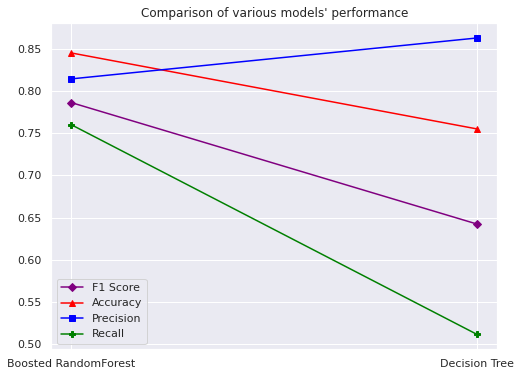

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Boosted RandomForest','Decision Tree'],[f1,f1_dtc,color=['red','green'])
plt.plot(['Boosted RandomForest','Decision Tree'],[f1,f1_dtc],color='purple',marker='D')
plt.plot(['Boosted RandomForest','Decision Tree'],[ma,ma_dtc],color='red',marker='^')
plt.plot(['Boosted RandomForest','Decision Tree'],[precision,precision_dtc],color='blue',marker='s')
plt.plot(['Boosted RandomForest','Decision Tree'],[recall,recall_dtc],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)